## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
file_path = 'C:/Users/luis/Desktop/Carrer Foundry boot camp/Advanced Analytics & Dashboard Design/Data/Prepared Data/merged_winners.csv'  

In [4]:
df = pd.read_csv(file_path)

### 2. Data cleaning

In [5]:
df.columns

Index(['Fighter', 'Fight Date', 'Fight Location', 'City', 'State', 'Country',
       'Winner', 'Is Title Bout', 'Weight Class', 'Average Knockdowns',
       'Average Knockdowns Taken', 'Average Significant Strikes Percentage',
       'Average Significant Strikes Percentage Taken',
       'Average Takedown Percentage', 'Average Takedown Percentage Taken',
       'Average Submission Attempts', 'Average Submission Attempts Taken',
       'Average Reversals', 'Average Reversals Taken',
       'Average Significant Strikes Attempted',
       'Average Significant Strikes Landed',
       'Average Significant Strikes Attempted Taken',
       'Average Significant Strikes Landed Taken',
       'Average Total Strikes Attempted', 'Average Total Strikes Landed',
       'Average Total Strikes Attempted Taken',
       'Average Total Strikes Landed Taken', 'Average Takedown Attempts',
       'Average Takedowns Landed', 'Average Takedown Attempts Taken',
       'Average Takedowns Landed Taken', 'Average

In [6]:
df.head(20)

,Fighter,Fight Date,Fight Location,City,State,Country,Winner,Is Title Bout,Weight Class,Average Knockdowns,...,Wins By Decision Split,Wins By Decision Unanimous,Wins By KO/TKO,Wins By Submission,Wins By TKO Doctor Stoppage,Fighter Stance,Fighter Height (cm),Fighter Reach (cm),Fighter Weight (lbs),Fighter Age
0,Adrian Yanez,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Bantamweight,1.000000,...,0,0,1,0,0,Orthodox,170.18,177.80,135.0,27
1,Trevin Giles,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Middleweight,1.031250,...,1,0,3,0,0,Orthodox,182.88,187.96,185.0,28
2,Tai Tuivasa,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Heavyweight,0.546875,...,0,1,3,0,0,Southpaw,187.96,190.50,264.0,28
3,Derek Brunson,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Middleweight,0.024551,...,0,4,7,1,0,Southpaw,185.42,195.58,185.0,37
4,Montel Jackson,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Bantamweight,0.750000,...,0,2,0,1,0,Southpaw,177.80,190.50,135.0,28
5,Bruno Silva,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Flyweight,0.000000,...,0,0,0,0,0,Orthodox,182.88,182.88,185.0,31
6,Charles Jourdain,2021-03-13,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Featherweight,0.500000,...,0,0,1,0,0,Switch,175.26,175.26,145.0,25
7,Angela Hill,2021-03-13,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Women's Strawweight,0.250153,...,0,5,1,0,1,Orthodox,160.02,162.56,115.0,36
8,Dan Ige,2021-03-13,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Featherweight,0.093750,...,2,2,1,1,0,Orthodox,170.18,180.34,145.0,29
9,Nasrat Haqparast,2021-03-13,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Lightweight,0.250000,...,0,3,1,0,0,Southpaw,177.80,182.88,155.0,25


In [7]:
df.shape

(5902, 77)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Fighter                 0
Fight Date              0
Fight Location          0
City                    0
State                   0
                       ..
Fighter Stance          0
Fighter Height (cm)     0
Fighter Reach (cm)      0
Fighter Weight (lbs)    0
Fighter Age             0
Length: 77, dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(5902,)

In [11]:
# Get summary statistics
df.describe()

,Average Knockdowns,Average Knockdowns Taken,Average Significant Strikes Percentage,Average Significant Strikes Percentage Taken,Average Takedown Percentage,Average Takedown Percentage Taken,Average Submission Attempts,Average Submission Attempts Taken,Average Reversals,Average Reversals Taken,...,Wins By Decision Majority,Wins By Decision Split,Wins By Decision Unanimous,Wins By KO/TKO,Wins By Submission,Wins By TKO Doctor Stoppage,Fighter Height (cm),Fighter Reach (cm),Fighter Weight (lbs),Fighter Age
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.218702,0.141431,0.459688,0.420782,0.300856,0.240713,0.438546,0.350379,0.122470,0.122047,...,0.022535,0.246696,1.110471,1.125381,0.715181,0.058794,179.124656,183.678753,170.726703,29.069299
std,0.353902,0.288042,0.118593,0.117036,0.250223,0.229484,0.649012,0.581852,0.292184,0.304740,...,0.148427,0.545942,1.575850,1.694575,1.292124,0.250605,8.829380,10.365517,35.739075,3.980648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,147.320000,115.000000,19.000000
25%,0.000000,0.000000,0.397500,0.356917,0.107552,0.059941,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000
50%,0.047168,0.000000,0.450000,0.421768,0.250000,0.191738,0.187500,0.125000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000
75%,0.312500,0.125032,0.518607,0.478809,0.457441,0.341094,0.573489,0.500000,0.062500,0.046387,...,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000
max,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,3.000000,4.000000,...,1.000000,4.000000,10.000000,11.000000,14.000000,2.000000,210.820000,213.360000,345.000000,47.000000


### 3. Data prep for regression analysis 

C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

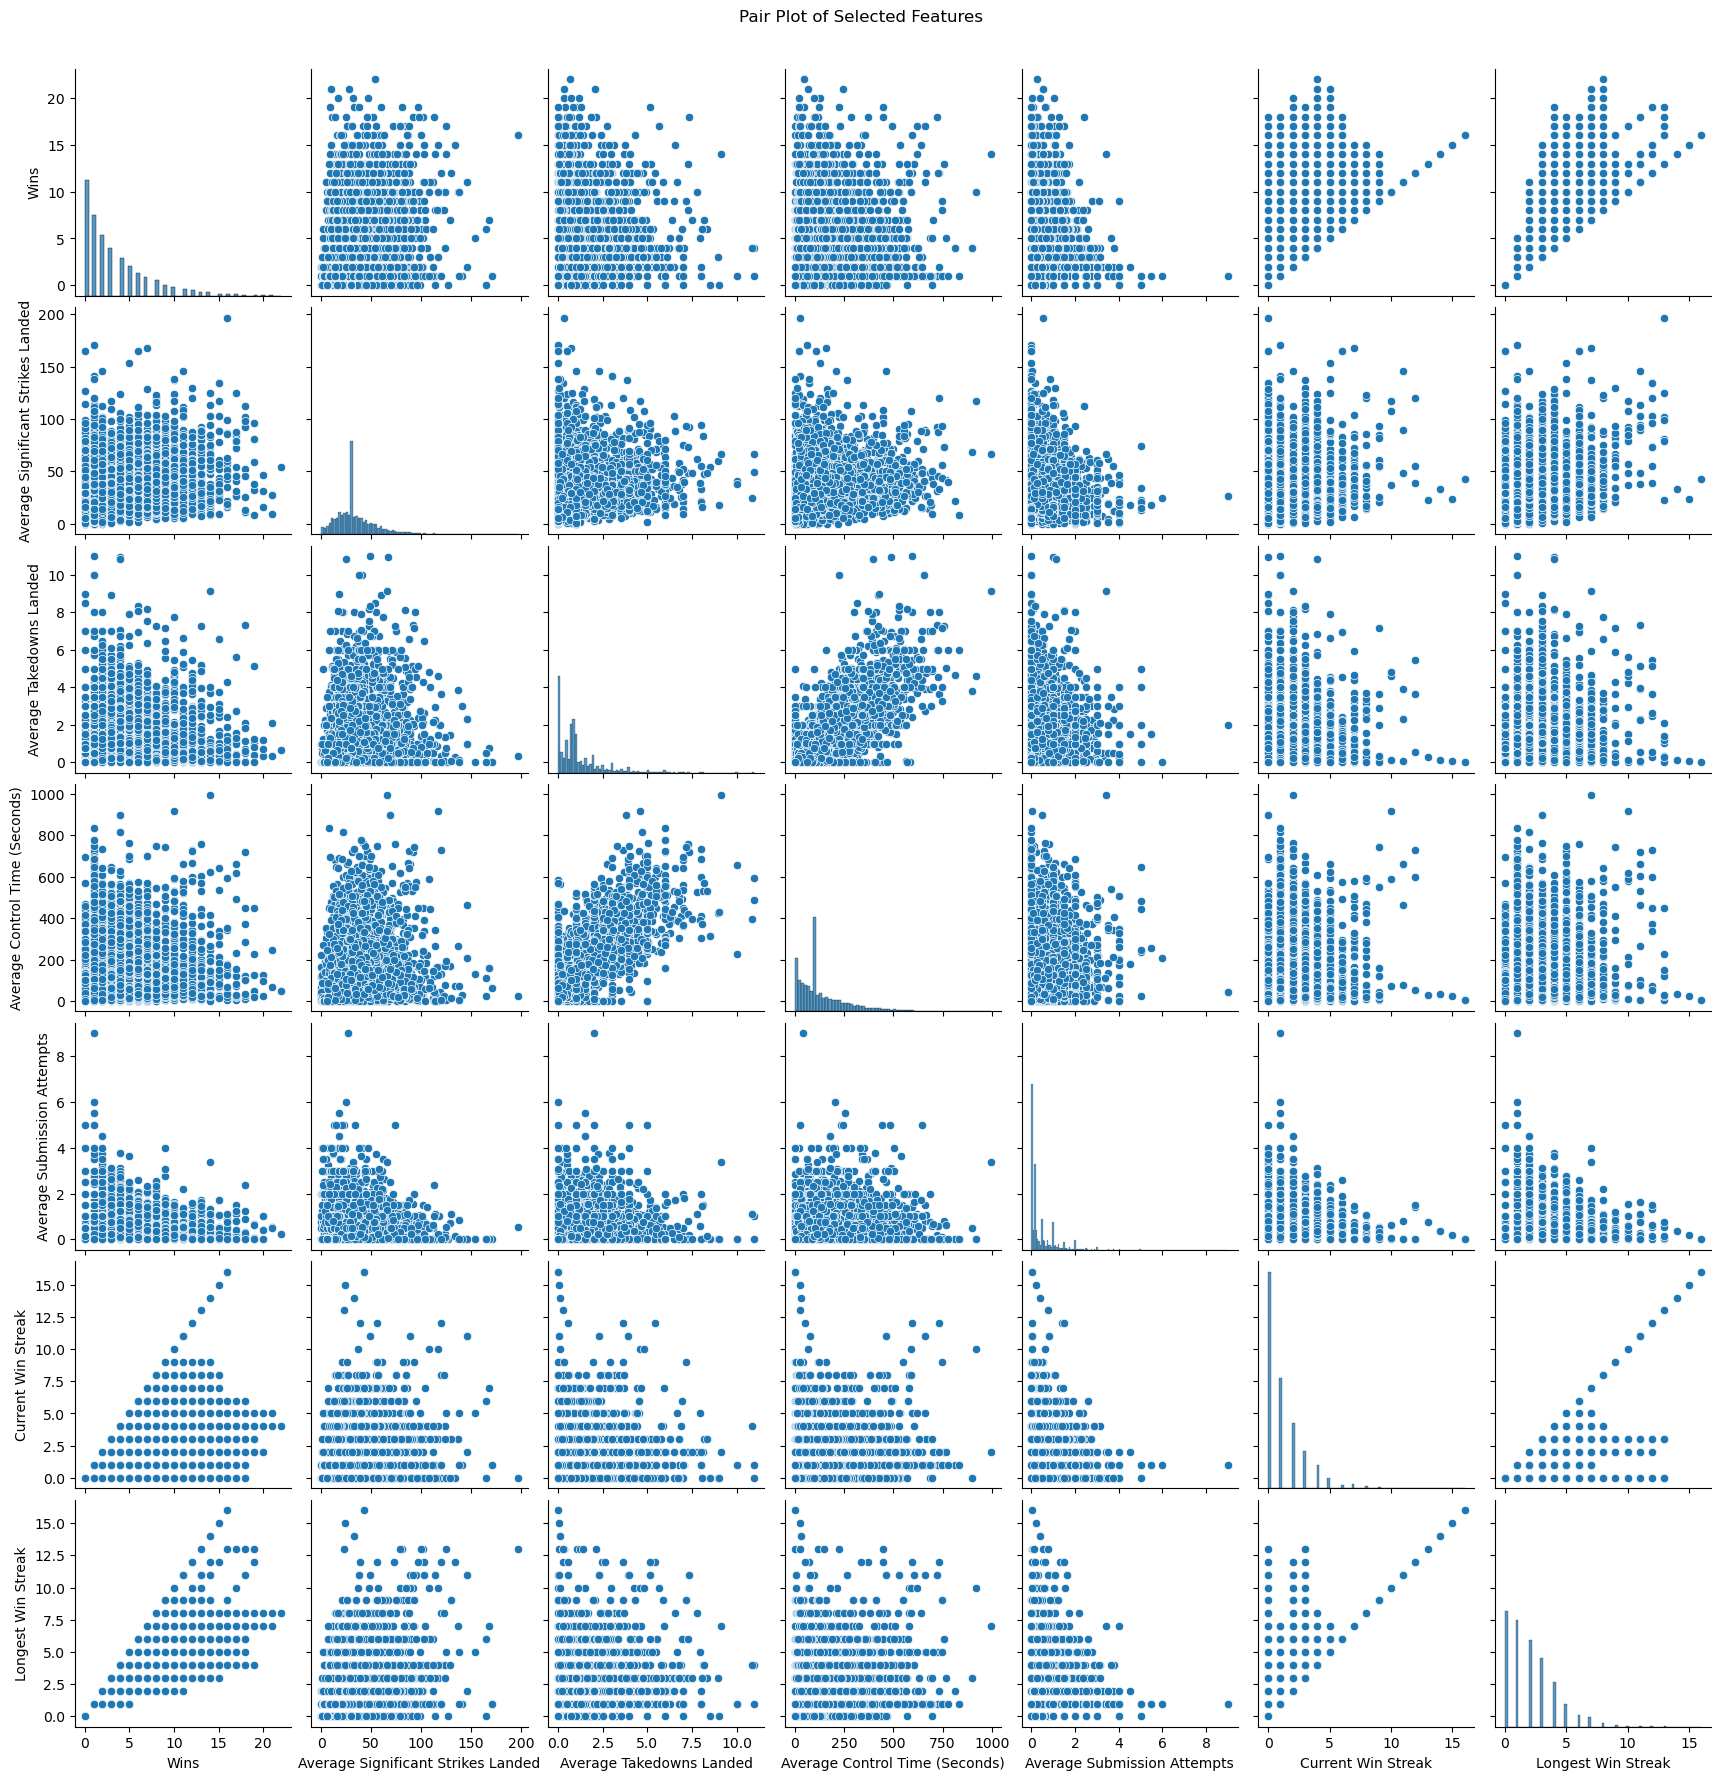

In [12]:
# Select a subset of features for pair plot
pair_features = ['Wins', 'Average Significant Strikes Landed', 'Average Takedowns Landed', 
            'Average Control Time (Seconds)', 'Average Submission Attempts', 
            'Current Win Streak', 'Longest Win Streak']

# Create a pair plot
sns.pairplot(df[pair_features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

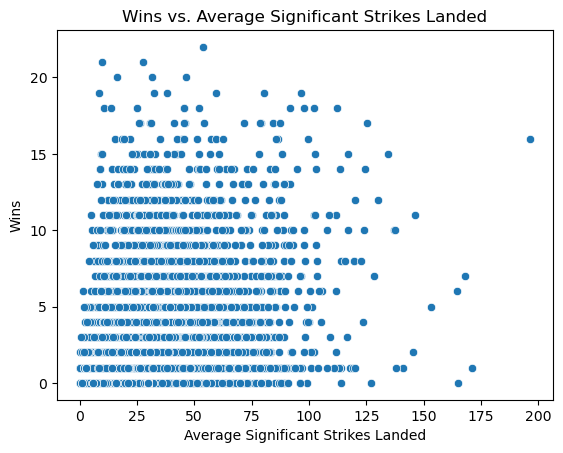

In [13]:
# Scatterplot: Wins vs. Average Significant Strikes Landed
sns.scatterplot(x='Average Significant Strikes Landed', y='Wins', data=df)
plt.title('Wins vs. Average Significant Strikes Landed')
plt.show()

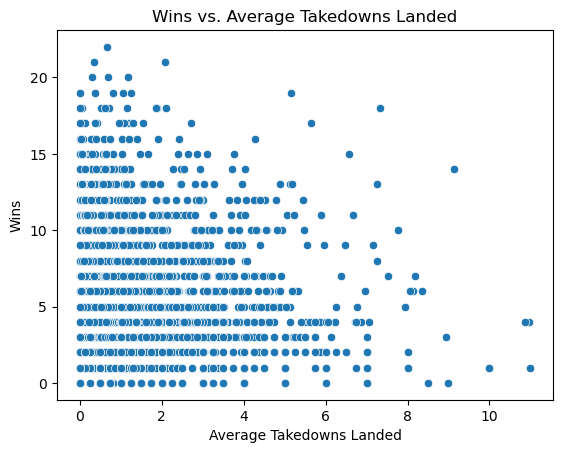

In [14]:
# Scatterplot: Wins vs. Average Takedowns Landed
sns.scatterplot(x='Average Takedowns Landed', y='Wins', data=df)
plt.title('Wins vs. Average Takedowns Landed')
plt.show()

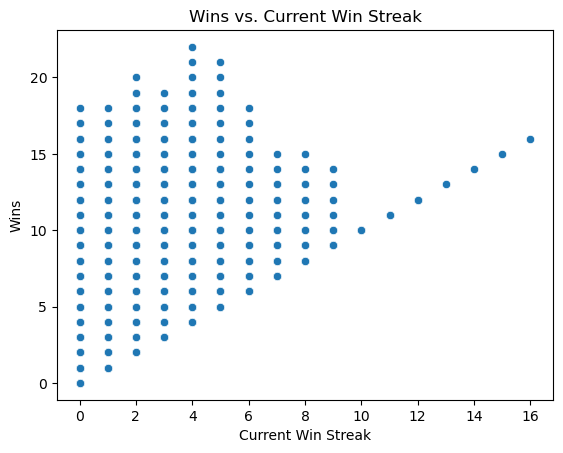

In [15]:
# Scatterplot: Wins vs. Current Win Streak
sns.scatterplot(x='Current Win Streak', y='Wins', data=df)
plt.title('Wins vs. Current Win Streak')
plt.show()

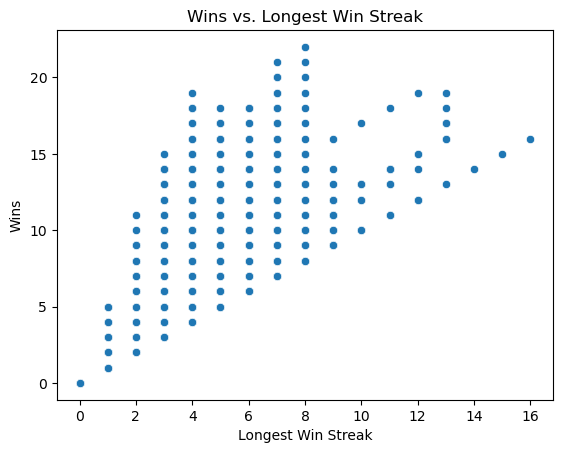

In [16]:
# Scatterplot: Wins vs. Current Win Streak
sns.scatterplot(x='Longest Win Streak', y='Wins', data=df)
plt.title('Wins vs. Longest Win Streak')
plt.show()

### Hypothesis

**Hypothesis Statement:**

The number of wins a UFC fighter has accumulated is positively correlated with their longest win streak and current win streak. Specifically, fighters who have longer win streaks and are currently on a winning streak tend to have a higher total number of wins. Additionally, it is hypothesized that the number of significant strikes landed also contributes positively to the total wins, although this relationship may be weaker compared to the win streak metrics.

**Sub-hypotheses:**
1. **Longest Win Streak**: There is a strong positive correlation between the total number of wins and the longest win streak a fighter has achieved in their career.
2. **Current Win Streak**: There is a positive correlation between the total number of wins and the fighter's current win streak.
3. **Average Significant Strikes Landed**: There is a positive correlation between the total number of wins and the average significant strikes landed per fight, though this correlation is expected to be weaker than that of the win streak metrics.

In [17]:
# Define the dependent variable (y)
y = df['Wins'].values  # Convert to NumPy array

# Define the independent variables (X)
X = df[['Current Win Streak', 'Longest Win Streak', 'Average Significant Strikes Landed']].values  # Convert to NumPy array

In [18]:
# Reshape y to be a 2D array (if necessary)
y = y.reshape(-1, 1)  # This makes y a 2D array with one column


In [19]:
# Check the shape of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


Shape of X: (5902, 3)
Shape of y: (5902, 1)


In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the resulting datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (4721, 3)
Shape of X_test: (1181, 3)
Shape of y_train: (4721, 1)
Shape of y_test: (1181, 1)


In [21]:
X

array([[ 1.     ,  1.     , 17.     ],
       [ 2.     ,  2.     , 43.15625],
       [ 3.     ,  3.     , 30.375  ],
       ...,
       [ 0.     ,  0.     , 29.6875 ],
       [ 3.     ,  3.     , 39.125  ],
       [ 2.     ,  2.     , 30.5    ]])

In [22]:
y

array([[1],
       [4],
       [4],
       ...,
       [0],
       [3],
       [2]], dtype=int64)

### 4. Regression analysis

In [23]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.4731426073899914
R^2 Score: 0.7323173393471054


### Plot for "Current Win Streak"

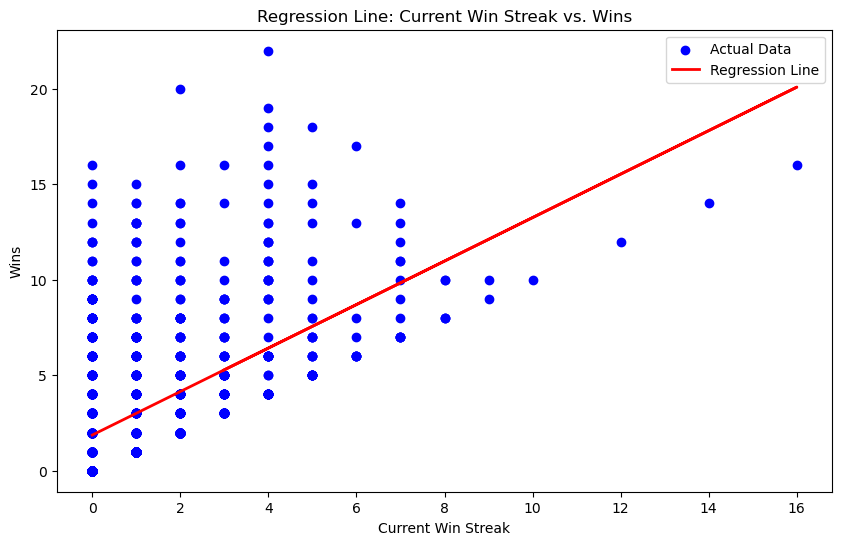

In [29]:
# Use only "Current Win Streak" as the independent variable
X_single = X_train[:, 0].reshape(-1, 1)

# Fit the linear regression model
model_single = LinearRegression()
model_single.fit(X_single, y_train)

# Predict on the test set using "Current Win Streak"
X_test_single = X_test[:, 0].reshape(-1, 1)
y_pred_single = model_single.predict(X_test_single)

# Plot the actual data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_single, y_test, color='blue', label='Actual Data')
plt.plot(X_test_single, y_pred_single, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Current Win Streak')
plt.ylabel('Wins')
plt.title('Regression Line: Current Win Streak vs. Wins')
plt.legend()
plt.show()

### Plot for "Longest Win Streak"

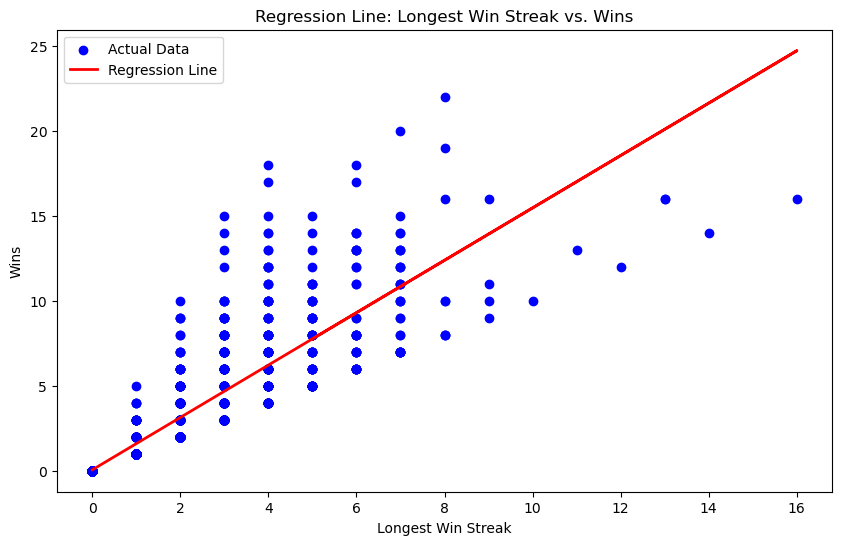

In [30]:
# Use only "Longest Win Streak" as the independent variable
X_longest_win_streak = X_train[:, 1].reshape(-1, 1)

# Fit the linear regression model
model_longest_win_streak = LinearRegression()
model_longest_win_streak.fit(X_longest_win_streak, y_train)

# Predict on the test set using "Longest Win Streak"
X_test_longest_win_streak = X_test[:, 1].reshape(-1, 1)
y_pred_longest_win_streak = model_longest_win_streak.predict(X_test_longest_win_streak)

# Plot the actual data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_longest_win_streak, y_test, color='blue', label='Actual Data')
plt.plot(X_test_longest_win_streak, y_pred_longest_win_streak, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Longest Win Streak')
plt.ylabel('Wins')
plt.title('Regression Line: Longest Win Streak vs. Wins')
plt.legend()
plt.show()

### Plot for "Average Significant Strikes Landed"

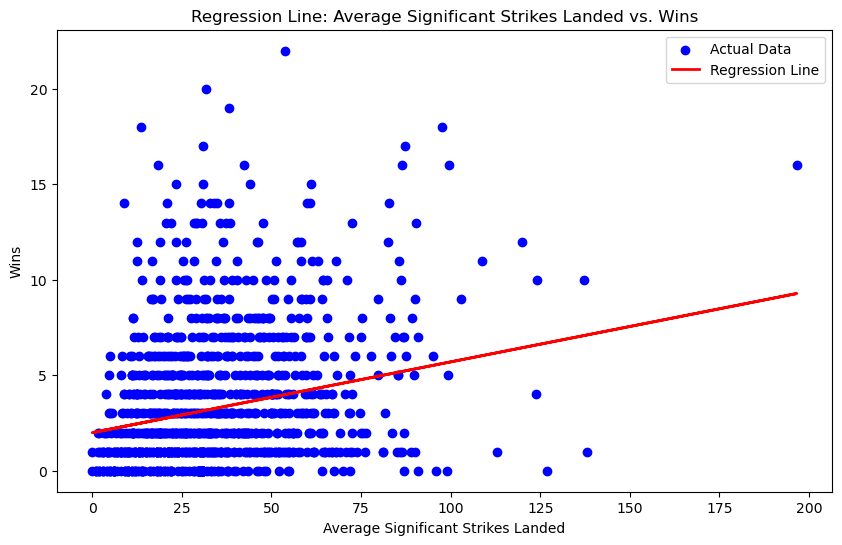

In [31]:
# Use only "Average Significant Strikes Landed" as the independent variable
X_avg_strikes_landed = X_train[:, 2].reshape(-1, 1)

# Fit the linear regression model
model_avg_strikes_landed = LinearRegression()
model_avg_strikes_landed.fit(X_avg_strikes_landed, y_train)

# Predict on the test set using "Average Significant Strikes Landed"
X_test_avg_strikes_landed = X_test[:, 2].reshape(-1, 1)
y_pred_avg_strikes_landed = model_avg_strikes_landed.predict(X_test_avg_strikes_landed)

# Plot the actual data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_avg_strikes_landed, y_test, color='blue', label='Actual Data')
plt.plot(X_test_avg_strikes_landed, y_pred_avg_strikes_landed, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Significant Strikes Landed')
plt.ylabel('Wins')
plt.title('Regression Line: Average Significant Strikes Landed vs. Wins')
plt.legend()
plt.show()


### Interpretation of Linear Regression Results

#### 1. **Current Win Streak vs. Wins**
The regression line for "Current Win Streak" against "Wins" shows a positive linear relationship. As the current win streak of a fighter increases, the total number of wins also tends to increase. This is intuitive, as fighters who consistently win are likely to accumulate more wins over time. The linear model captures this trend well, indicating that "Current Win Streak" is a good predictor of the total number of wins.

#### 2. **Longest Win Streak vs. Wins**
Similarly, the regression line for "Longest Win Streak" versus "Wins" also shows a positive relationship. Fighters with longer win streaks tend to have a higher total number of wins. The relationship is slightly stronger compared to "Current Win Streak," suggesting that a fighter's historical performance (longest streak) might be a more stable predictor of total wins.

#### 3. **Average Significant Strikes Landed vs. Wins**
The relationship between "Average Significant Strikes Landed" and "Wins" is positive but weaker compared to the previous two variables. While more significant strikes generally correlate with more wins, the scatter plot shows a wider spread of data points. This suggests that while striking is important, other factors (such as grappling or defensive skills) also play a significant role in determining the outcome of fights. The weaker slope of the regression line reflects this complexity.

### Model Performance Metrics
- **Mean Squared Error (MSE):** 3.4731426073899914  
  The MSE indicates the average squared difference between the actual and predicted values. A lower MSE suggests that the model's predictions are closer to the actual values, but in this context, an MSE of 3.47 implies that there is still some variance in the data that the model does not capture perfectly.

- **R² Score:** 0.7323173393471054  
  The R² score represents the proportion of variance in the dependent variable ("Wins") that is predictable from the independent variables ("Current Win Streak," "Longest Win Streak," and "Average Significant Strikes Landed"). An R² score of 0.73 suggests that approximately 73% of the variability in "Wins" can be explained by the model. This is a strong indication that the chosen independent variables are relevant predictors.

### Conclusion
- "Current Win Streak" and "Longest Win Streak" both show strong positive correlations with total wins, making them reliable predictors.
- "Average Significant Strikes Landed" shows a positive but weaker correlation, indicating that striking alone is not sufficient to predict fight outcomes.
- The MSE and R² score further confirm that the model is relatively effective in predicting the number of wins based on these independent variables.
- Overall, a fighter’s win streak history (both current and longest) is a more consistent predictor of success than the number of strikes landed.

These insights can help in understanding which aspects of a fighter's performance are most indicative of their overall success.


In [32]:
# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Wins': y_test.flatten(),  # Flatten in case y_test is a 2D array
    'Predicted Wins': y_pred.flatten()  # Flatten in case y_pred is a 2D array
})

In [33]:
comparison_df.head(30)

,Actual Wins,Predicted Wins
0,0,0.089791
1,1,1.526105
2,5,6.443542
3,6,3.361478
4,2,2.999353
5,3,4.455951
6,3,2.991633
7,9,3.357711
8,2,2.980583
9,1,1.696877


### Model Performance on the Test Set

The comparison between actual and predicted wins provides valuable insights into the model's performance:

- **Accuracy:** The model seems to predict the number of wins with moderate accuracy. In many cases, the predictions are close to the actual values, especially for instances where the actual wins are lower. However, the model occasionally underestimates or overestimates the number of wins significantly, particularly when the actual number of wins is high.

- **Mean Squared Error (MSE):** The MSE value of approximately 3.47 suggests that the average squared difference between the actual and predicted wins is relatively low, but there is still room for improvement. This indicates that while the model is capturing the general trend, it may not be fully capturing the complexity of the data.

- **R² Score:** The R² score of 0.73 indicates that the model explains approximately 73% of the variance in the number of wins. This is a strong result, but the remaining 27% suggests that other factors not included in the model might also influence the number of wins.

### Reflections on Data Bias

- **Possible Data Bias:** The model's predictions might be influenced by inherent biases in the data. For instance, if the dataset over-represents certain fighters or fight outcomes, the model might learn patterns that do not generalize well to less common scenarios. This could lead to systematic underestimation or overestimation in specific cases, such as fighters with very high or very low win streaks.

- **Impact of Bias:** If the data is biased towards certain fighters or outcomes, the model could disproportionately favor these in its predictions. For example, if the dataset contains more data on successful fighters, the model might overestimate the win potential of similar fighters while underestimating others. This bias could skew the results and limit the model's applicability to a broader population.

- **Mitigating Bias:** To mitigate potential bias, it would be beneficial to ensure that the dataset is as representative as possible. This could involve balancing the data to include a more even distribution of different fighter profiles, fight types, and outcomes. Additionally, exploring more advanced models that can better capture complex relationships and reduce the impact of bias might also improve performance.

### Conclusion

Overall, the model performs reasonably well on the test set, but there are clear areas for improvement. The results suggest that while the model captures the general trend, it might not fully account for the complexities of the data. Addressing potential data biases and refining the model could lead to more accurate predictions and a better understanding of the factors that influence fight outcomes.
